# Task #2: Plot the profile rates per 1M residents

**Since the countries populations vary a lot, counting the absolute cases and deaths is not a
fair metric. Normalizing the cases and deaths per 1 million residents is a typical procedure
to get an unbiased view of the data. To do do, simply use the logic below:**

df['Cases \ _per \_1m '] = df['Cases ']/df['Population ']* 1000000


## a) cumulative infection rate per 1M

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
from matplotlib.ticker import ScalarFormatter

In [2]:
pip install adjustText

Note: you may need to restart the kernel to use updated packages.


In [3]:
from adjustText import adjust_text

In [4]:
covid_cumulative = pd.read_excel("covid_a_master_cumulative_table.xlsx")
covid_cumulative

,Unnamed: 0,Cases,Deaths,Date,Countries,Population,Continent
0,0,0,0,2019-12-31,Afghanistan,38041757.0,Asia
1,1,0,0,2019-12-31,Algeria,43053054.0,Africa
2,2,0,0,2019-12-31,Armenia,2957728.0,Europe
3,3,0,0,2019-12-31,Australia,25203200.0,Oceania
4,4,0,0,2019-12-31,Austria,8858775.0,Europe
...,...,...,...,...,...,...,...
38906,38906,1034,30,2020-08-27,Vietnam,96462108.0,Asia
38907,38907,766,1,2020-08-27,Western_Sahara,582458.0,Africa
38908,38908,1930,560,2020-08-27,Yemen,29161922.0,Asia
38909,38909,11376,282,2020-08-27,Zambia,17861034.0,Africa


## FILTER THE LAST DAY OF THE RESULTS AND PICK THE TOP N IN NUMBER OF CASES

In [5]:
last_day_per_country = covid_cumulative.groupby(by=['Countries'])['Date'].max() 
last_day_per_country = last_day_per_country.to_frame() 
last_day_per_country.reset_index(inplace=True) 

In [6]:
# N: HOW MANY TOP COUNTRIES YOU WANT TO PICK IN TERMS OF # OF CASES
N = 25
last_day = pd.merge(covid_cumulative, last_day_per_country, how='inner', left_on = ['Countries', 'Date'], right_on = ['Countries', 'Date'])
last_day = last_day.sort_values('Cases', ascending=False)
last_day
top_countries = last_day[:N]['Countries'].tolist()
top_countries

['USA',
 'Brazil',
 'India',
 'Russia',
 'S.Africa',
 'Peru',
 'Mexico',
 'Colombia',
 'Spain',
 'Chile',
 'Argentina',
 'Iran',
 'UK',
 'S.Arabia',
 'Bangladesh',
 'Pakistan',
 'Italy',
 'Turkey',
 'France',
 'Germany',
 'Iraq',
 'Philippines',
 'Indonesia',
 'Kazakhstan',
 'Canada']

In [7]:
# K: HOW MANY CASES YOU CONSIDER THE DAY 0
K = 100
covid_top_countries = covid_cumulative[covid_cumulative.Countries.isin(top_countries)]
covid_top_countries = covid_top_countries[covid_top_countries['Cases'] > K]

In [8]:
# FIND THE DATE THAT THE FIRST K CASES WERE IDENTIFIED
day_0_for_every_country = covid_top_countries.groupby(by=['Countries']).min()
day_0_for_every_country = day_0_for_every_country['Date']

In [9]:
# MERGE THE TWO TO GET THE DAY_0 IN THE df, AND CALCULATE THE DAYS_FROM_0
covid_top_countries = covid_top_countries.merge(day_0_for_every_country, how='inner', on='Countries')
covid_top_countries.rename(columns = {'Date_y': 'Day_0'}, inplace = True)
covid_top_countries['Days_from_0'] = (covid_top_countries['Date_x'] - covid_top_countries['Day_0']).dt.days

In [10]:
covid_top_countries

,Unnamed: 0,Cases,Deaths,Date_x,Countries,Population,Continent,Day_0,Days_from_0
0,3718,132,2,2020-02-24,Italy,60359546.0,Europe,2020-02-24,0
1,3785,229,6,2020-02-25,Italy,60359546.0,Europe,2020-02-24,1
2,3852,322,11,2020-02-26,Italy,60359546.0,Europe,2020-02-24,2
3,3919,400,12,2020-02-27,Italy,60359546.0,Europe,2020-02-24,3
4,3986,650,17,2020-02-28,Italy,60359546.0,Europe,2020-02-24,4
...,...,...,...,...,...,...,...,...,...
4176,37882,292625,3907,2020-08-23,Bangladesh,163046173.0,Asia,2020-04-07,138
4177,38091,294598,3941,2020-08-24,Bangladesh,163046173.0,Asia,2020-04-07,139
4178,38300,297083,3983,2020-08-25,Bangladesh,163046173.0,Asia,2020-04-07,140
4179,38509,299628,4028,2020-08-26,Bangladesh,163046173.0,Asia,2020-04-07,141


In [11]:
covid_top_countries['Cases_per_1m'] = covid_top_countries['Cases']/covid_top_countries['Population']*1000000
covid_top_countries.drop(columns=['Unnamed: 0'],axis=1,inplace=True)
covid_top_countries

,Cases,Deaths,Date_x,Countries,Population,Continent,Day_0,Days_from_0,Cases_per_1m
0,132,2,2020-02-24,Italy,60359546.0,Europe,2020-02-24,0,2.186895
1,229,6,2020-02-25,Italy,60359546.0,Europe,2020-02-24,1,3.793932
2,322,11,2020-02-26,Italy,60359546.0,Europe,2020-02-24,2,5.334699
3,400,12,2020-02-27,Italy,60359546.0,Europe,2020-02-24,3,6.626955
4,650,17,2020-02-28,Italy,60359546.0,Europe,2020-02-24,4,10.768802
...,...,...,...,...,...,...,...,...,...
4176,292625,3907,2020-08-23,Bangladesh,163046173.0,Asia,2020-04-07,138,1794.737004
4177,294598,3941,2020-08-24,Bangladesh,163046173.0,Asia,2020-04-07,139,1806.837870
4178,297083,3983,2020-08-25,Bangladesh,163046173.0,Asia,2020-04-07,140,1822.078952
4179,299628,4028,2020-08-26,Bangladesh,163046173.0,Asia,2020-04-07,141,1837.688027


In [12]:
covid_top_countries.set_index('Countries', drop=False, inplace=True)
covid_top_countries.index.name = None
max_slope = covid_top_countries.groupby(by=['Countries']).max()
max_slope = max_slope.sort_values('Cases_per_1m', ascending=False)
max_slope['Countries'] = max_slope.index
#max_slope

In [13]:
data_1_5 = covid_top_countries[covid_top_countries.Countries.isin(max_slope[:5]['Countries'].tolist())]
countries_1_5 = max_slope[:5]['Countries'].tolist()
data_6_10 = covid_top_countries[covid_top_countries.Countries.isin(max_slope[5:10]['Countries'].tolist())]
countries_6_10 = max_slope[5:10]['Countries'].tolist()
data_11_15 = covid_top_countries[covid_top_countries.Countries.isin(max_slope[10:15]['Countries'].tolist())]
countries_11_15 = max_slope[10:15]['Countries'].tolist()
data_16_20 = covid_top_countries[covid_top_countries.Countries.isin(max_slope[15:20]['Countries'].tolist())]
countries_16_20 = max_slope[15:20]['Countries'].tolist()
max_slope

,Cases,Deaths,Date_x,Population,Continent,Day_0,Days_from_0,Cases_per_1m,Countries
Countries,,,,,,,,,
Chile,402365,10990,2020-08-27,1.895204e+07,America,2020-03-17,163,21230.701611,Chile
Peru,613378,28124,2020-08-27,3.251046e+07,America,2020-03-18,162,18867.095768,Peru
USA,5821876,179714,2020-08-27,3.290649e+08,America,2020-03-03,177,17692.180780,USA
Brazil,3717156,117665,2020-08-27,2.110495e+08,America,2020-03-15,165,17612.719601,Brazil
Colombia,572270,18184,2020-08-27,5.033944e+07,America,2020-03-19,161,11368.222727,Colombia
S.Africa,615701,13502,2020-08-27,5.855827e+07,Africa,2020-03-19,161,10514.330965,S.Africa
S.Arabia,310836,3755,2020-08-27,3.426853e+07,Asia,2020-03-16,164,9070.596523,S.Arabia
Spain,419849,28971,2020-08-26,4.693706e+07,Europe,2020-03-02,177,8944.936048,Spain
Argentina,370175,7839,2020-08-27,4.478068e+07,America,2020-03-20,160,8266.400629,Argentina


### plot the 2x2 subplots with:
### cumulative infection rate per 1M

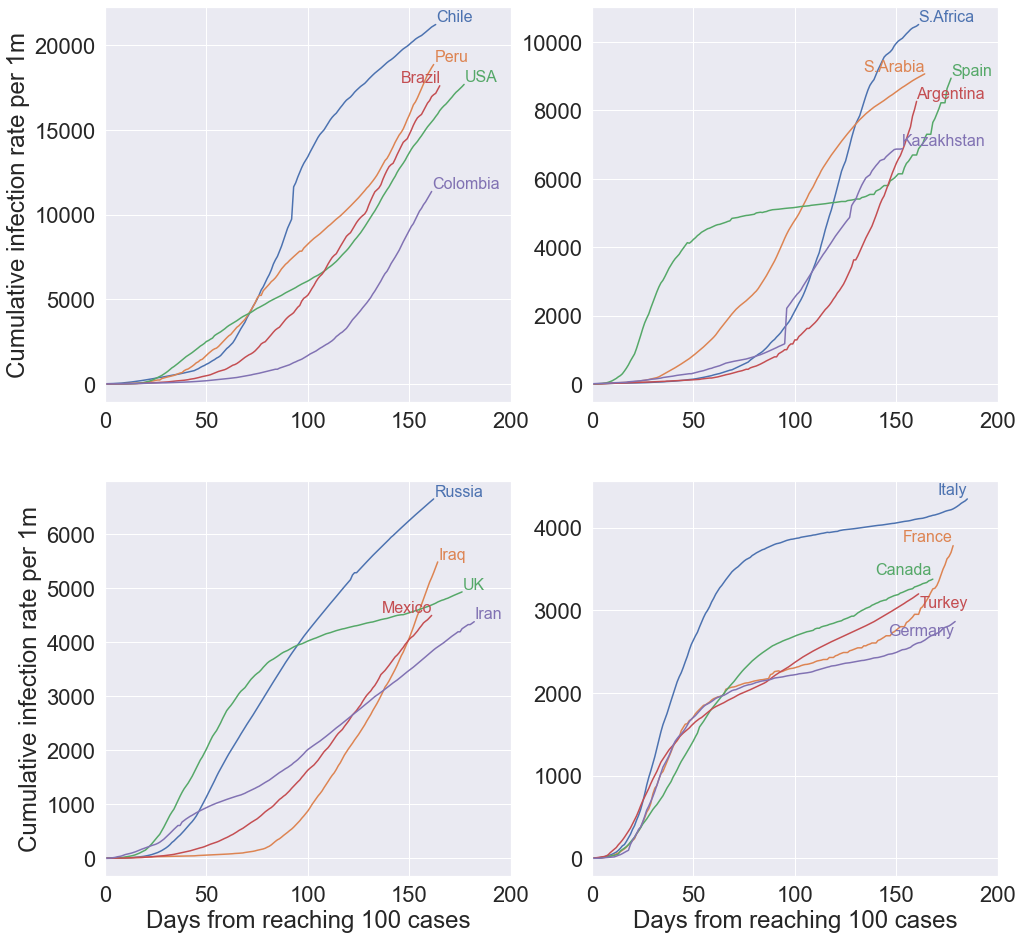

In [14]:
sns.set(rc={'figure.figsize':(16,16)}, font_scale = 2)
fig, axes = plt.subplots(2, 2)

sns.lineplot(x="Days_from_0", y="Cases_per_1m", hue="Countries", data=data_1_5, markers=True, hue_order=countries_1_5, legend=False, ax=axes[0, 0])
texts = [axes[0, 0].text(max_slope.loc[str(country)]['Days_from_0'], max_slope.loc[str(country)]['Cases_per_1m'], str(country), fontsize=16, color=axes[0, 0].get_lines()[countries_1_5.index(country)].get_c(), ha = 'left', va = 'center') for country in countries_1_5]
adjust_text(texts)
axes[0, 0].set_ylabel("Cumulative infection rate per 1m",fontsize=24)

sns.lineplot(x="Days_from_0", y="Cases_per_1m", hue="Countries", data=data_6_10, markers=True, hue_order=countries_6_10, legend=False, ax=axes[0, 1])
texts = [axes[0, 1].text(max_slope.loc[str(country)]['Days_from_0'], max_slope.loc[str(country)]['Cases_per_1m'], str(country), fontsize=16, color=axes[0, 1].get_lines()[countries_6_10.index(country)].get_c(), ha = 'left', va = 'top') for country in countries_6_10]
adjust_text(texts)

sns.lineplot(x="Days_from_0", y="Cases_per_1m", hue="Countries", data=data_11_15, markers=True, hue_order=countries_11_15, legend=False, ax=axes[1, 0])
texts = [axes[1, 0].text(max_slope.loc[str(country)]['Days_from_0'], max_slope.loc[str(country)]['Cases_per_1m'], str(country), fontsize=16, color=axes[1, 0].get_lines()[countries_11_15.index(country)].get_c(), ha = 'left', va = 'center') for country in countries_11_15]
adjust_text(texts)
axes[1, 0].set_ylabel("Cumulative infection rate per 1m",fontsize=24)
axes[1, 0].set_xlabel("Days from reaching 100 cases",fontsize=24)

sns.lineplot(x="Days_from_0", y="Cases_per_1m", hue="Countries", data=data_16_20, markers=True, hue_order=countries_16_20, legend=False, ax=axes[1, 1])
texts = [axes[1, 1].text(max_slope.loc[str(country)]['Days_from_0'], max_slope.loc[str(country)]['Cases_per_1m'], str(country), fontsize=16, color=axes[1, 1].get_lines()[countries_16_20.index(country)].get_c(), ha = 'left', va = 'center') for country in countries_16_20]
adjust_text(texts)
axes[1, 1].set_xlabel("Days from reaching 100 cases",fontsize=24)

axes[0, 1].set_ylabel("",fontsize=24)
axes[1, 1].set_ylabel("",fontsize=24)
axes[0, 0].set_xlabel("",fontsize=24)
axes[0, 1].set_xlabel("",fontsize=24)
axes[0, 1].set_xlim([0, 200])
axes[1, 1].set_xlim([0, 200])
axes[0, 0].set_xlim([0, 200])
axes[1, 0].set_xlim([0, 200])
# axes[0, 0].set_yscale('log')
# axes[0, 1].set_yscale('log')
# axes[1, 0].set_yscale('log')
# axes[1, 1].set_yscale('log')

plt.savefig('Fig_2_1_Machavolu_Manoj Chandra.png')